# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

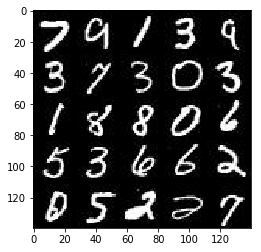

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

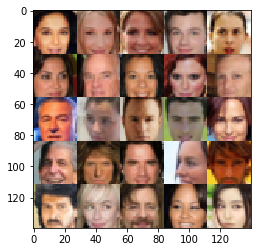

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learn_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2 # for leaky ReLU
#     print(images)
    
    # images input is 28*28*3
    with tf.variable_scope('discriminator', reuse=reuse):        
        
        layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        layer1 = tf.maximum(alpha * layer1, layer1)
        # layer1 is 14*14*64
#         print(layer1)
        
        layer2 = tf.layers.conv2d(layer1, 128, 5, strides=2, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        layer2 = tf.maximum(alpha * layer2, layer2)
        # layer2 is 7*7*128
#         print(layer2)
        
        layer3 = tf.layers.conv2d(layer2, 256, 5, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(alpha * layer3, layer3)
        # layer3 is 4*4*256
#         print(layer3)
        
        flattened = tf.reshape(layer3, (-1, 4*4*256))
        logits = tf.layers.dense(flattened, 1)
        output = tf.sigmoid(logits)
#         print(logits)

        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2 # leaky ReLU
    
    # this was suggested here: https://discussions.udacity.com/t/generator-output-shape/247548/6?u=ken_3024204938779305
    reuse = not is_train 
    
#     print('output_channel_dim: ', out_channel_dim)
#     print('input: ', z)
    
    with tf.variable_scope('generator', reuse=reuse):
        layer1 = tf.layers.dense(z, 7*7*512)
        layer1 = tf.reshape(layer1, (-1, 7, 7, 512))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        # 7*7*512
#         print('layer 1: ', layer1)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 5, strides=2, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        # 14*14*256
#         print('layer 2: ', layer2)
        
    # Cannot get to the desired output if I use three layers, like in the DCGAN exercise
#         layer3 = tf.layers.conv2d_transpose(layer2, 128, 5, strides=2, padding='same')
#         layer3 = tf.layers.batch_normalization(layer3, training=is_train)
#         layer3 = tf.maximum(alpha * layer3, layer3)
#         # 14*14*128
#         print('layer 3: ', layer3)

        logits = tf.layers.conv2d_transpose(layer2, out_channel_dim, 5, strides=2, padding='same')
        # Needs to be 28*28*out_channel_dim
#         print('logits: {}'.format(logits))
    
        output = tf.tanh(logits)
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.2
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print_loss_every = 10
    show_generator_output_every = 100
    number_of_batches = data_shape[0] // batch_size
    
    # setup GAN
    
    image_width, image_height, image_channels = data_shape[1], data_shape[2], data_shape[3]
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    
    # train GAN
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch_i in range(epoch_count):            
            batch_counter = 0
            
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_counter += 1
                
                batch_images = batch_images * 2.0
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                
                if batch_counter % print_loss_every ==0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{} | Batch {}/{}: ".format(epoch_i+1, epoch_count, batch_counter, number_of_batches),
                          "Discriminator Loss: {:.4f}".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if batch_counter % show_generator_output_every == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 | Batch 10/468:  Discriminator Loss: 4.1421 Generator Loss: 0.0741
Epoch 1/2 | Batch 20/468:  Discriminator Loss: 2.7511 Generator Loss: 0.2357
Epoch 1/2 | Batch 30/468:  Discriminator Loss: 2.2118 Generator Loss: 0.6593
Epoch 1/2 | Batch 40/468:  Discriminator Loss: 1.9963 Generator Loss: 0.7335
Epoch 1/2 | Batch 50/468:  Discriminator Loss: 1.8037 Generator Loss: 1.0663
Epoch 1/2 | Batch 60/468:  Discriminator Loss: 1.7712 Generator Loss: 0.7847
Epoch 1/2 | Batch 70/468:  Discriminator Loss: 1.6382 Generator Loss: 0.9015
Epoch 1/2 | Batch 80/468:  Discriminator Loss: 1.5370 Generator Loss: 0.6782
Epoch 1/2 | Batch 90/468:  Discriminator Loss: 1.5250 Generator Loss: 0.8577
Epoch 1/2 | Batch 100/468:  Discriminator Loss: 1.5026 Generator Loss: 0.8579


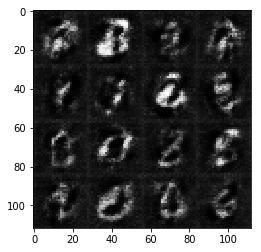

Epoch 1/2 | Batch 110/468:  Discriminator Loss: 1.3863 Generator Loss: 0.6413
Epoch 1/2 | Batch 120/468:  Discriminator Loss: 1.4081 Generator Loss: 0.9537
Epoch 1/2 | Batch 130/468:  Discriminator Loss: 1.4364 Generator Loss: 0.8525
Epoch 1/2 | Batch 140/468:  Discriminator Loss: 1.4875 Generator Loss: 0.9011
Epoch 1/2 | Batch 150/468:  Discriminator Loss: 1.4159 Generator Loss: 0.7702
Epoch 1/2 | Batch 160/468:  Discriminator Loss: 1.4374 Generator Loss: 0.7918
Epoch 1/2 | Batch 170/468:  Discriminator Loss: 1.4766 Generator Loss: 0.8698
Epoch 1/2 | Batch 180/468:  Discriminator Loss: 1.4570 Generator Loss: 0.7753
Epoch 1/2 | Batch 190/468:  Discriminator Loss: 1.5517 Generator Loss: 0.9302
Epoch 1/2 | Batch 200/468:  Discriminator Loss: 1.4190 Generator Loss: 0.7912


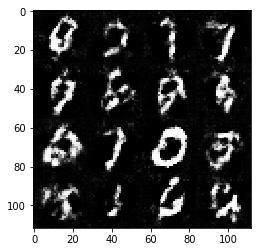

Epoch 1/2 | Batch 210/468:  Discriminator Loss: 1.5055 Generator Loss: 0.8837
Epoch 1/2 | Batch 220/468:  Discriminator Loss: 1.5567 Generator Loss: 0.8303
Epoch 1/2 | Batch 230/468:  Discriminator Loss: 1.4719 Generator Loss: 0.7266
Epoch 1/2 | Batch 240/468:  Discriminator Loss: 1.5157 Generator Loss: 0.8064
Epoch 1/2 | Batch 250/468:  Discriminator Loss: 1.5472 Generator Loss: 0.8380
Epoch 1/2 | Batch 260/468:  Discriminator Loss: 1.5692 Generator Loss: 0.8156
Epoch 1/2 | Batch 270/468:  Discriminator Loss: 1.5504 Generator Loss: 0.8714
Epoch 1/2 | Batch 280/468:  Discriminator Loss: 1.5520 Generator Loss: 0.7888
Epoch 1/2 | Batch 290/468:  Discriminator Loss: 1.4304 Generator Loss: 0.6906
Epoch 1/2 | Batch 300/468:  Discriminator Loss: 1.5101 Generator Loss: 0.7658


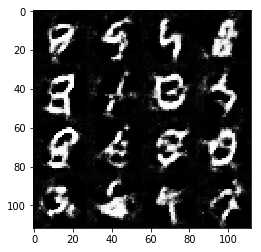

Epoch 1/2 | Batch 310/468:  Discriminator Loss: 1.5083 Generator Loss: 0.7539
Epoch 1/2 | Batch 320/468:  Discriminator Loss: 1.5008 Generator Loss: 0.7167
Epoch 1/2 | Batch 330/468:  Discriminator Loss: 1.5833 Generator Loss: 0.8723
Epoch 1/2 | Batch 340/468:  Discriminator Loss: 1.5068 Generator Loss: 0.4625
Epoch 1/2 | Batch 350/468:  Discriminator Loss: 1.8286 Generator Loss: 0.2282
Epoch 1/2 | Batch 360/468:  Discriminator Loss: 1.4708 Generator Loss: 0.5775
Epoch 1/2 | Batch 370/468:  Discriminator Loss: 1.5650 Generator Loss: 0.7539
Epoch 1/2 | Batch 380/468:  Discriminator Loss: 1.5362 Generator Loss: 0.7344
Epoch 1/2 | Batch 390/468:  Discriminator Loss: 1.4920 Generator Loss: 0.6191
Epoch 1/2 | Batch 400/468:  Discriminator Loss: 1.4924 Generator Loss: 0.7094


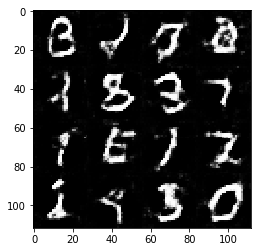

Epoch 1/2 | Batch 410/468:  Discriminator Loss: 1.5476 Generator Loss: 0.8338
Epoch 1/2 | Batch 420/468:  Discriminator Loss: 1.5322 Generator Loss: 0.6574
Epoch 1/2 | Batch 430/468:  Discriminator Loss: 1.4761 Generator Loss: 0.7836
Epoch 1/2 | Batch 440/468:  Discriminator Loss: 1.4881 Generator Loss: 0.7178
Epoch 1/2 | Batch 450/468:  Discriminator Loss: 1.4824 Generator Loss: 0.8485
Epoch 1/2 | Batch 460/468:  Discriminator Loss: 1.5183 Generator Loss: 0.7216
Epoch 2/2 | Batch 10/468:  Discriminator Loss: 1.5740 Generator Loss: 0.7379
Epoch 2/2 | Batch 20/468:  Discriminator Loss: 1.4610 Generator Loss: 0.6636
Epoch 2/2 | Batch 30/468:  Discriminator Loss: 1.5643 Generator Loss: 0.8320
Epoch 2/2 | Batch 40/468:  Discriminator Loss: 1.6551 Generator Loss: 0.3030
Epoch 2/2 | Batch 50/468:  Discriminator Loss: 1.5527 Generator Loss: 0.3686
Epoch 2/2 | Batch 60/468:  Discriminator Loss: 1.5935 Generator Loss: 0.3430
Epoch 2/2 | Batch 70/468:  Discriminator Loss: 1.6160 Generator Loss: 

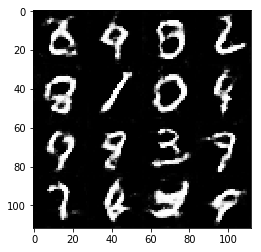

Epoch 2/2 | Batch 110/468:  Discriminator Loss: 1.6703 Generator Loss: 0.8706
Epoch 2/2 | Batch 120/468:  Discriminator Loss: 1.4522 Generator Loss: 0.6102
Epoch 2/2 | Batch 130/468:  Discriminator Loss: 1.5875 Generator Loss: 0.8299
Epoch 2/2 | Batch 140/468:  Discriminator Loss: 1.5214 Generator Loss: 0.6043
Epoch 2/2 | Batch 150/468:  Discriminator Loss: 1.5288 Generator Loss: 0.6340
Epoch 2/2 | Batch 160/468:  Discriminator Loss: 1.5138 Generator Loss: 0.7249
Epoch 2/2 | Batch 170/468:  Discriminator Loss: 1.5791 Generator Loss: 0.7433
Epoch 2/2 | Batch 180/468:  Discriminator Loss: 1.4528 Generator Loss: 0.4978
Epoch 2/2 | Batch 190/468:  Discriminator Loss: 1.5014 Generator Loss: 0.5825
Epoch 2/2 | Batch 200/468:  Discriminator Loss: 1.4262 Generator Loss: 0.5882


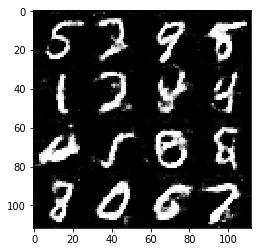

Epoch 2/2 | Batch 210/468:  Discriminator Loss: 1.5944 Generator Loss: 0.3341
Epoch 2/2 | Batch 220/468:  Discriminator Loss: 1.9439 Generator Loss: 0.1939
Epoch 2/2 | Batch 230/468:  Discriminator Loss: 1.4396 Generator Loss: 0.5246
Epoch 2/2 | Batch 240/468:  Discriminator Loss: 1.4196 Generator Loss: 0.6554
Epoch 2/2 | Batch 250/468:  Discriminator Loss: 1.6751 Generator Loss: 0.3744
Epoch 2/2 | Batch 260/468:  Discriminator Loss: 1.5811 Generator Loss: 0.3654
Epoch 2/2 | Batch 270/468:  Discriminator Loss: 1.4149 Generator Loss: 0.7273
Epoch 2/2 | Batch 280/468:  Discriminator Loss: 1.4608 Generator Loss: 0.5369
Epoch 2/2 | Batch 290/468:  Discriminator Loss: 1.4953 Generator Loss: 0.6721
Epoch 2/2 | Batch 300/468:  Discriminator Loss: 1.5527 Generator Loss: 0.7280


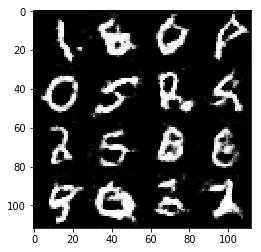

Epoch 2/2 | Batch 310/468:  Discriminator Loss: 1.4945 Generator Loss: 0.4226
Epoch 2/2 | Batch 320/468:  Discriminator Loss: 1.7957 Generator Loss: 0.2382
Epoch 2/2 | Batch 330/468:  Discriminator Loss: 1.5608 Generator Loss: 0.3819
Epoch 2/2 | Batch 340/468:  Discriminator Loss: 1.4763 Generator Loss: 0.4083
Epoch 2/2 | Batch 350/468:  Discriminator Loss: 1.6463 Generator Loss: 0.7908
Epoch 2/2 | Batch 360/468:  Discriminator Loss: 1.5192 Generator Loss: 0.4440
Epoch 2/2 | Batch 370/468:  Discriminator Loss: 1.7503 Generator Loss: 0.2507
Epoch 2/2 | Batch 380/468:  Discriminator Loss: 1.4454 Generator Loss: 0.4927
Epoch 2/2 | Batch 390/468:  Discriminator Loss: 2.8945 Generator Loss: 1.2087
Epoch 2/2 | Batch 400/468:  Discriminator Loss: 1.6595 Generator Loss: 0.3629


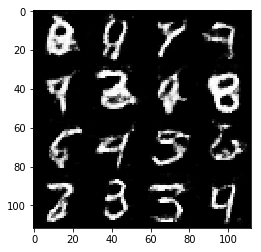

Epoch 2/2 | Batch 410/468:  Discriminator Loss: 1.4703 Generator Loss: 0.4435
Epoch 2/2 | Batch 420/468:  Discriminator Loss: 1.7950 Generator Loss: 0.2452
Epoch 2/2 | Batch 430/468:  Discriminator Loss: 1.7391 Generator Loss: 0.2685
Epoch 2/2 | Batch 440/468:  Discriminator Loss: 1.5103 Generator Loss: 0.4442
Epoch 2/2 | Batch 450/468:  Discriminator Loss: 1.7879 Generator Loss: 0.2431
Epoch 2/2 | Batch 460/468:  Discriminator Loss: 1.5365 Generator Loss: 0.3406


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 | Batch 10/1582:  Discriminator Loss: 3.9492 Generator Loss: 0.0536
Epoch 1/1 | Batch 20/1582:  Discriminator Loss: 3.2254 Generator Loss: 0.0604
Epoch 1/1 | Batch 30/1582:  Discriminator Loss: 2.6136 Generator Loss: 0.1578
Epoch 1/1 | Batch 40/1582:  Discriminator Loss: 2.3006 Generator Loss: 0.2569
Epoch 1/1 | Batch 50/1582:  Discriminator Loss: 2.1149 Generator Loss: 0.2491
Epoch 1/1 | Batch 60/1582:  Discriminator Loss: 2.0259 Generator Loss: 0.4137
Epoch 1/1 | Batch 70/1582:  Discriminator Loss: 1.9416 Generator Loss: 0.4348
Epoch 1/1 | Batch 80/1582:  Discriminator Loss: 1.8266 Generator Loss: 0.5557
Epoch 1/1 | Batch 90/1582:  Discriminator Loss: 1.7444 Generator Loss: 0.3919
Epoch 1/1 | Batch 100/1582:  Discriminator Loss: 1.6627 Generator Loss: 0.5842


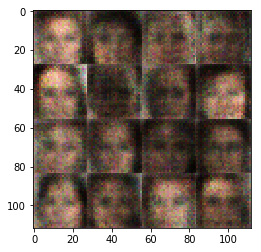

Epoch 1/1 | Batch 110/1582:  Discriminator Loss: 1.6403 Generator Loss: 0.5792
Epoch 1/1 | Batch 120/1582:  Discriminator Loss: 1.6749 Generator Loss: 0.4661
Epoch 1/1 | Batch 130/1582:  Discriminator Loss: 1.6541 Generator Loss: 0.5019
Epoch 1/1 | Batch 140/1582:  Discriminator Loss: 1.5882 Generator Loss: 0.5227
Epoch 1/1 | Batch 150/1582:  Discriminator Loss: 1.6109 Generator Loss: 0.5850
Epoch 1/1 | Batch 160/1582:  Discriminator Loss: 1.5842 Generator Loss: 0.5361
Epoch 1/1 | Batch 170/1582:  Discriminator Loss: 1.6219 Generator Loss: 0.5432
Epoch 1/1 | Batch 180/1582:  Discriminator Loss: 1.5906 Generator Loss: 0.5679
Epoch 1/1 | Batch 190/1582:  Discriminator Loss: 1.5863 Generator Loss: 0.5230
Epoch 1/1 | Batch 200/1582:  Discriminator Loss: 1.6480 Generator Loss: 0.6359


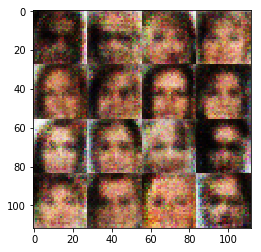

Epoch 1/1 | Batch 210/1582:  Discriminator Loss: 1.5802 Generator Loss: 0.5848
Epoch 1/1 | Batch 220/1582:  Discriminator Loss: 1.6088 Generator Loss: 0.6717
Epoch 1/1 | Batch 230/1582:  Discriminator Loss: 1.5678 Generator Loss: 0.5851
Epoch 1/1 | Batch 240/1582:  Discriminator Loss: 1.5667 Generator Loss: 0.5673
Epoch 1/1 | Batch 250/1582:  Discriminator Loss: 1.5543 Generator Loss: 0.6490
Epoch 1/1 | Batch 260/1582:  Discriminator Loss: 1.5784 Generator Loss: 0.5796
Epoch 1/1 | Batch 270/1582:  Discriminator Loss: 1.5052 Generator Loss: 0.6408
Epoch 1/1 | Batch 280/1582:  Discriminator Loss: 1.5385 Generator Loss: 0.5954
Epoch 1/1 | Batch 290/1582:  Discriminator Loss: 1.5286 Generator Loss: 0.6439
Epoch 1/1 | Batch 300/1582:  Discriminator Loss: 1.5164 Generator Loss: 0.5886


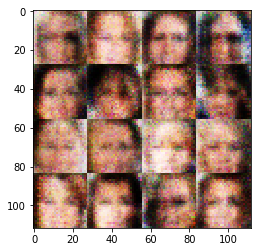

Epoch 1/1 | Batch 310/1582:  Discriminator Loss: 1.5681 Generator Loss: 0.5451
Epoch 1/1 | Batch 320/1582:  Discriminator Loss: 1.5329 Generator Loss: 0.6132
Epoch 1/1 | Batch 330/1582:  Discriminator Loss: 1.4797 Generator Loss: 0.6163
Epoch 1/1 | Batch 340/1582:  Discriminator Loss: 1.5000 Generator Loss: 0.5770
Epoch 1/1 | Batch 350/1582:  Discriminator Loss: 1.5152 Generator Loss: 0.6175
Epoch 1/1 | Batch 360/1582:  Discriminator Loss: 1.5720 Generator Loss: 0.6491
Epoch 1/1 | Batch 370/1582:  Discriminator Loss: 1.5088 Generator Loss: 0.5688
Epoch 1/1 | Batch 380/1582:  Discriminator Loss: 1.4894 Generator Loss: 0.6679
Epoch 1/1 | Batch 390/1582:  Discriminator Loss: 1.4759 Generator Loss: 0.6292
Epoch 1/1 | Batch 400/1582:  Discriminator Loss: 1.5110 Generator Loss: 0.5603


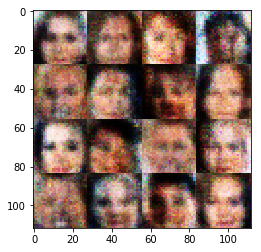

Epoch 1/1 | Batch 410/1582:  Discriminator Loss: 1.4605 Generator Loss: 0.5864
Epoch 1/1 | Batch 420/1582:  Discriminator Loss: 1.4540 Generator Loss: 0.6662
Epoch 1/1 | Batch 430/1582:  Discriminator Loss: 1.4745 Generator Loss: 0.6089
Epoch 1/1 | Batch 440/1582:  Discriminator Loss: 1.5443 Generator Loss: 0.6265
Epoch 1/1 | Batch 450/1582:  Discriminator Loss: 1.5028 Generator Loss: 0.6016
Epoch 1/1 | Batch 460/1582:  Discriminator Loss: 1.5439 Generator Loss: 0.6604
Epoch 1/1 | Batch 470/1582:  Discriminator Loss: 1.4861 Generator Loss: 0.6379
Epoch 1/1 | Batch 480/1582:  Discriminator Loss: 1.5190 Generator Loss: 0.7176
Epoch 1/1 | Batch 490/1582:  Discriminator Loss: 1.5159 Generator Loss: 0.5691
Epoch 1/1 | Batch 500/1582:  Discriminator Loss: 1.5602 Generator Loss: 0.5848


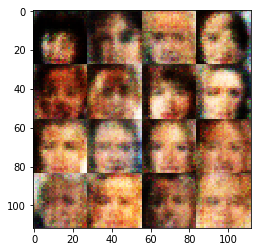

Epoch 1/1 | Batch 510/1582:  Discriminator Loss: 1.5131 Generator Loss: 0.6260
Epoch 1/1 | Batch 520/1582:  Discriminator Loss: 1.4792 Generator Loss: 0.6056
Epoch 1/1 | Batch 530/1582:  Discriminator Loss: 1.4871 Generator Loss: 0.6591
Epoch 1/1 | Batch 540/1582:  Discriminator Loss: 1.5006 Generator Loss: 0.6526
Epoch 1/1 | Batch 550/1582:  Discriminator Loss: 1.4777 Generator Loss: 0.7219
Epoch 1/1 | Batch 560/1582:  Discriminator Loss: 1.4670 Generator Loss: 0.6116
Epoch 1/1 | Batch 570/1582:  Discriminator Loss: 1.4258 Generator Loss: 0.6283
Epoch 1/1 | Batch 580/1582:  Discriminator Loss: 1.4397 Generator Loss: 0.6574
Epoch 1/1 | Batch 590/1582:  Discriminator Loss: 1.4734 Generator Loss: 0.5739
Epoch 1/1 | Batch 600/1582:  Discriminator Loss: 1.4906 Generator Loss: 0.6567


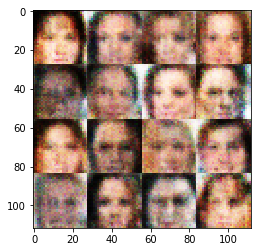

Epoch 1/1 | Batch 610/1582:  Discriminator Loss: 1.5216 Generator Loss: 0.5473
Epoch 1/1 | Batch 620/1582:  Discriminator Loss: 1.4307 Generator Loss: 0.6373
Epoch 1/1 | Batch 630/1582:  Discriminator Loss: 1.5112 Generator Loss: 0.6070
Epoch 1/1 | Batch 640/1582:  Discriminator Loss: 1.5393 Generator Loss: 0.5863
Epoch 1/1 | Batch 650/1582:  Discriminator Loss: 1.4505 Generator Loss: 0.6952
Epoch 1/1 | Batch 660/1582:  Discriminator Loss: 1.4618 Generator Loss: 0.6580
Epoch 1/1 | Batch 670/1582:  Discriminator Loss: 1.4554 Generator Loss: 0.6129
Epoch 1/1 | Batch 680/1582:  Discriminator Loss: 1.5144 Generator Loss: 0.6170
Epoch 1/1 | Batch 690/1582:  Discriminator Loss: 1.4925 Generator Loss: 0.5874
Epoch 1/1 | Batch 700/1582:  Discriminator Loss: 1.4618 Generator Loss: 0.7003


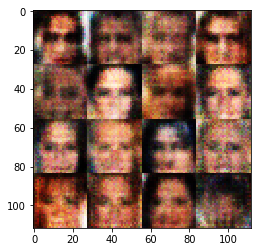

Epoch 1/1 | Batch 710/1582:  Discriminator Loss: 1.4578 Generator Loss: 0.5906
Epoch 1/1 | Batch 720/1582:  Discriminator Loss: 1.4300 Generator Loss: 0.6597
Epoch 1/1 | Batch 730/1582:  Discriminator Loss: 1.4420 Generator Loss: 0.7446
Epoch 1/1 | Batch 740/1582:  Discriminator Loss: 1.4496 Generator Loss: 0.6732
Epoch 1/1 | Batch 750/1582:  Discriminator Loss: 1.5451 Generator Loss: 0.5941
Epoch 1/1 | Batch 760/1582:  Discriminator Loss: 1.4774 Generator Loss: 0.6085
Epoch 1/1 | Batch 770/1582:  Discriminator Loss: 1.4366 Generator Loss: 0.6476
Epoch 1/1 | Batch 780/1582:  Discriminator Loss: 1.5139 Generator Loss: 0.5934
Epoch 1/1 | Batch 790/1582:  Discriminator Loss: 1.4762 Generator Loss: 0.6931
Epoch 1/1 | Batch 800/1582:  Discriminator Loss: 1.4614 Generator Loss: 0.6926


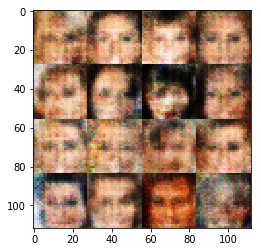

Epoch 1/1 | Batch 810/1582:  Discriminator Loss: 1.4784 Generator Loss: 0.6553
Epoch 1/1 | Batch 820/1582:  Discriminator Loss: 1.4472 Generator Loss: 0.6632
Epoch 1/1 | Batch 830/1582:  Discriminator Loss: 1.4507 Generator Loss: 0.6604
Epoch 1/1 | Batch 840/1582:  Discriminator Loss: 1.4079 Generator Loss: 0.6665
Epoch 1/1 | Batch 850/1582:  Discriminator Loss: 1.4310 Generator Loss: 0.6114
Epoch 1/1 | Batch 860/1582:  Discriminator Loss: 1.4568 Generator Loss: 0.6413
Epoch 1/1 | Batch 870/1582:  Discriminator Loss: 1.4299 Generator Loss: 0.6377
Epoch 1/1 | Batch 880/1582:  Discriminator Loss: 1.4590 Generator Loss: 0.6193
Epoch 1/1 | Batch 890/1582:  Discriminator Loss: 1.4495 Generator Loss: 0.5806
Epoch 1/1 | Batch 900/1582:  Discriminator Loss: 1.4834 Generator Loss: 0.6571


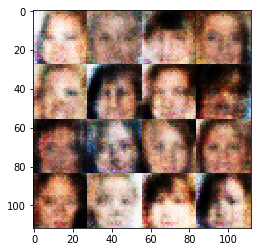

Epoch 1/1 | Batch 910/1582:  Discriminator Loss: 1.5073 Generator Loss: 0.6314
Epoch 1/1 | Batch 920/1582:  Discriminator Loss: 1.4663 Generator Loss: 0.6466
Epoch 1/1 | Batch 930/1582:  Discriminator Loss: 1.5160 Generator Loss: 0.6554
Epoch 1/1 | Batch 940/1582:  Discriminator Loss: 1.4369 Generator Loss: 0.6591
Epoch 1/1 | Batch 950/1582:  Discriminator Loss: 1.4694 Generator Loss: 0.6651
Epoch 1/1 | Batch 960/1582:  Discriminator Loss: 1.4757 Generator Loss: 0.6192
Epoch 1/1 | Batch 970/1582:  Discriminator Loss: 1.4488 Generator Loss: 0.6516
Epoch 1/1 | Batch 980/1582:  Discriminator Loss: 1.4775 Generator Loss: 0.5721
Epoch 1/1 | Batch 990/1582:  Discriminator Loss: 1.4411 Generator Loss: 0.6716
Epoch 1/1 | Batch 1000/1582:  Discriminator Loss: 1.5213 Generator Loss: 0.6978


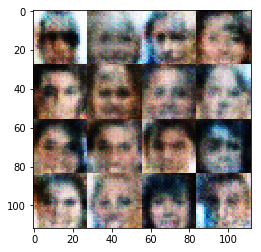

Epoch 1/1 | Batch 1010/1582:  Discriminator Loss: 1.4764 Generator Loss: 0.5811
Epoch 1/1 | Batch 1020/1582:  Discriminator Loss: 1.4249 Generator Loss: 0.6922
Epoch 1/1 | Batch 1030/1582:  Discriminator Loss: 1.4787 Generator Loss: 0.6117
Epoch 1/1 | Batch 1040/1582:  Discriminator Loss: 1.4850 Generator Loss: 0.6201
Epoch 1/1 | Batch 1050/1582:  Discriminator Loss: 1.4687 Generator Loss: 0.6121
Epoch 1/1 | Batch 1060/1582:  Discriminator Loss: 1.4630 Generator Loss: 0.6248
Epoch 1/1 | Batch 1070/1582:  Discriminator Loss: 1.4541 Generator Loss: 0.6675
Epoch 1/1 | Batch 1080/1582:  Discriminator Loss: 1.4269 Generator Loss: 0.6757
Epoch 1/1 | Batch 1090/1582:  Discriminator Loss: 1.4263 Generator Loss: 0.6497
Epoch 1/1 | Batch 1100/1582:  Discriminator Loss: 1.4410 Generator Loss: 0.6327


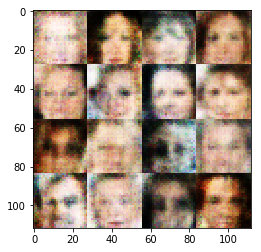

Epoch 1/1 | Batch 1110/1582:  Discriminator Loss: 1.4347 Generator Loss: 0.7910
Epoch 1/1 | Batch 1120/1582:  Discriminator Loss: 1.4129 Generator Loss: 0.6888
Epoch 1/1 | Batch 1130/1582:  Discriminator Loss: 1.4888 Generator Loss: 0.6482
Epoch 1/1 | Batch 1140/1582:  Discriminator Loss: 1.4568 Generator Loss: 0.6159
Epoch 1/1 | Batch 1150/1582:  Discriminator Loss: 1.4521 Generator Loss: 0.6377
Epoch 1/1 | Batch 1160/1582:  Discriminator Loss: 1.4203 Generator Loss: 0.6904
Epoch 1/1 | Batch 1170/1582:  Discriminator Loss: 1.4214 Generator Loss: 0.7347
Epoch 1/1 | Batch 1180/1582:  Discriminator Loss: 1.4244 Generator Loss: 0.6892
Epoch 1/1 | Batch 1190/1582:  Discriminator Loss: 1.4554 Generator Loss: 0.6473
Epoch 1/1 | Batch 1200/1582:  Discriminator Loss: 1.4227 Generator Loss: 0.6621


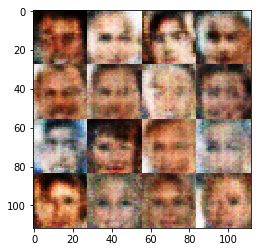

Epoch 1/1 | Batch 1210/1582:  Discriminator Loss: 1.4224 Generator Loss: 0.6932
Epoch 1/1 | Batch 1220/1582:  Discriminator Loss: 1.4633 Generator Loss: 0.6781
Epoch 1/1 | Batch 1230/1582:  Discriminator Loss: 1.4631 Generator Loss: 0.6565
Epoch 1/1 | Batch 1240/1582:  Discriminator Loss: 1.4649 Generator Loss: 0.6487
Epoch 1/1 | Batch 1250/1582:  Discriminator Loss: 1.4211 Generator Loss: 0.6441
Epoch 1/1 | Batch 1260/1582:  Discriminator Loss: 1.4355 Generator Loss: 0.6948
Epoch 1/1 | Batch 1270/1582:  Discriminator Loss: 1.4849 Generator Loss: 0.6837
Epoch 1/1 | Batch 1280/1582:  Discriminator Loss: 1.4366 Generator Loss: 0.6784
Epoch 1/1 | Batch 1290/1582:  Discriminator Loss: 1.4093 Generator Loss: 0.6896
Epoch 1/1 | Batch 1300/1582:  Discriminator Loss: 1.4680 Generator Loss: 0.5810


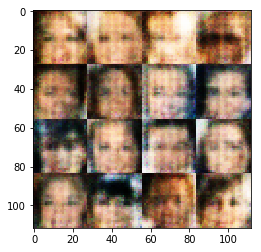

Epoch 1/1 | Batch 1310/1582:  Discriminator Loss: 1.4445 Generator Loss: 0.6354
Epoch 1/1 | Batch 1320/1582:  Discriminator Loss: 1.4769 Generator Loss: 0.5983
Epoch 1/1 | Batch 1330/1582:  Discriminator Loss: 1.4897 Generator Loss: 0.5832


KeyboardInterrupt: 

In [12]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.